In [ ]:
# Add your Twitter credentials. Do NOT share them with anyone


consumer_key =
consumer_secret =
access_token = 
access_token_secret =

In [110]:
consumer_key = 'PAKlkz9EAKgmRP2d0OIDbEIYm'
consumer_secret = 'UbGYhpaSyJOQxPJPnM3mQhx4u597JdxptXuyyignaFjEx78D6z'
access_token = '1177114275959255040-NGvHhb9XXY8y1aAw1nl0yGqpCFe0SL'
access_token_secret = 'LrMD58UTMf1qMyl2I35yyso5fSMZuZA7Ba57TVYu0bnlu'

In [112]:
#! pip install tweepy

import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import sys
import datetime

import pandas as pd
pd.options.display.max_colwidth =1800

# keys

consumer_key = consumer_key
consumer_secret = consumer_secret 
access_token = access_token
access_token_secret = access_token_secret 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth) 



#Switching to application authentication

auth=tweepy.AppAuthHandler(consumer_key, consumer_secret)



#Setting up new api wrapper, using authentication only

api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True) 

if (not api):
    print('problem with api')



listOfTweets = []



def query_twitter(keyword, lang, number_tweets):
    for tweet in tweepy.Cursor(api.search, q=keyword, tweet_mode='extended', lang=lang).items(number_tweets):
        # Add tweets in this format
        dict_ = {'Screen Name': tweet.user.screen_name,
          'User Name': tweet.user.name,
          'Followers Count': tweet.user.followers_count, 
          'Friends Count': tweet.user.friends_count,
          'Users Tweets Count': tweet.user.statuses_count,
          'User Location': tweet.user.location,
          'Coordinates': tweet.coordinates,
          'Place': tweet.place, 
          'Tweet Created At': tweet.created_at,
          'Tweet Text': tweet.full_text,
          'Tweet Coordinates': tweet.coordinates,
          'Retweet Count': tweet.retweet_count,
          'Retweeted': tweet.retweeted,
          'Phone Type': tweet.source,
          'Favorite Count': tweet.favorite_count,
          'Favorited': tweet.favorited,
          'Replied': tweet.in_reply_to_status_id_str
          }
        listOfTweets.append(dict_)
        df_tweets = pd.DataFrame(listOfTweets)
    return df_tweets

  Using cached tweepy-3.9.0-py2.py3-none-any.whl (30 kB)


In [113]:
# Type the following

keyword = 'pet shampoo' # type in between the '' in red 

lang = 'en' # en for English. Check the full list of languages here >>>>> 

number_tweets= 60 # type the number of tweets. The current limit is 10000

# now press ENTER and SHIFT 

In [114]:
# press ENTER and SHIFT 
d = query_twitter (keyword =keyword, lang = lang, number_tweets=number_tweets)
d = d.drop_duplicates(subset='Tweet Text')
d.to_csv('dataframe.csv') 

# the tables will be temporarily saved on your Colab (find them in a folder on the left side of your screen!)
# Make sure you download them if you want to use them after closing Colab

retweet_count10 = d.sort_values(by='Retweet Count').head(10).copy()

#retweet_count10.to_csv('retweet_count10.csv')

favorite_count10 = d.sort_values(by='Favorite Count').head(10).copy()

#favorite_count10.to_csv('favorite_count.csv10')

d['Retweet by Followers'] = d['Retweet Count'] / d['Followers Count']
retweet_by_followers10 = d.sort_values(by='Retweet by Followers', ascending=False).head(10).copy()

#retweet_by_followers10.to_csv('retweet_by_followers10.csv')

d['Retweet by Friends'] = d['Retweet Count'] / d['Friends Count']
retweet_by_friends10 = d.sort_values(by='Retweet by Friends', ascending=False).head(10).copy()

#retweet_by_friends10.to_csv('retweet_by_friends10.csv')

d['Favorite by Followers'] = d['Favorite Count'] / d['Followers Count']
favorite_by_followers10  = d.sort_values(by='Favorite by Followers', ascending=False).head(10).copy()

#favorite_by_followers10.to_csv('favorite_by_followers10.csv')

d['Favorite by Friends'] = d['Favorite Count'] / d['Friends Count']
favorite_by_friends10 = d.sort_values(by='Favorite by Friends', ascending=False).head(10).copy()

#favorite_by_friends10.to_csv('favorite_by_friends10.csv')


In [115]:
# most common words 

from nltk.corpus import stopwords
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.summarization import keywords
import re
#from nltk.stem.lancaster import LancasterStemmer
#from nltk.stem import SnowballStemmer

#nltk.download('stopwords')
#nltk.download('punkt')


stopwords_language = 'english'

stop = stopwords.words(stopwords_language) + list(string.punctuation)

stop = stop + ['http', 'https', 'amp']

lemma = WordNetLemmatizer()


combined_text = [w for w in d['Tweet Text']]

combined_text = str(combined_text)

tok_text = [w for w in word_tokenize(str(combined_text))]

tok_text = [w.lower() for w in tok_text if w not in stop and len(w) >2]


tok_text = [lemma.lemmatize(w) for w in tok_text]

keys = keywords(str(tok_text), words=15).split('\n')

key_words = keys.copy()

keys_score =  keywords(str(tok_text), scores = True, words=24)#.split('\n')




#print(keys_score)
print(keys)

['pet', 'shampoo', 'http', 'https', 'amp', 'dog', 'bath', 'bathe', 'product', 'brush', 'hair', 'selling', 'need', 'needed', 'wash', 'washing', 'like', 'shower', 'cat']


In [151]:
remove = ['http' ,  'https', 'amp', 'like', 'bathe', 'product', 'hair', 'selling', 'needed']

clean_keys = [w for w in keys if w not in remove]
clean_keys

['pet',
 'shampoo',
 'dog',
 'bath',
 'brush',
 'need',
 'wash',
 'washing',
 'shower',
 'cat']

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

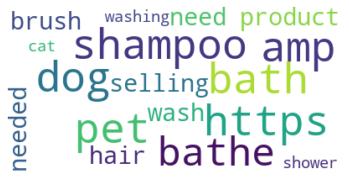

In [117]:
# wordcloud 
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

stopwords_cloud = set(STOPWORDS)

word_keys = re.sub("'", " ",str(keys))

wordcloud = WordCloud(max_font_size=50, max_words=20, stopwords = stopwords_cloud, background_color="white").generate(word_keys)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [118]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 59
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Screen Name            53 non-null     object        
 1   User Name              53 non-null     object        
 2   Followers Count        53 non-null     int64         
 3   Friends Count          53 non-null     int64         
 4   Users Tweets Count     53 non-null     int64         
 5   User Location          53 non-null     object        
 6   Coordinates            1 non-null      object        
 7   Place                  3 non-null      object        
 8   Tweet Created At       53 non-null     datetime64[ns]
 9   Tweet Text             53 non-null     object        
 10  Tweet Coordinates      1 non-null      object        
 11  Retweet Count          53 non-null     int64         
 12  Retweeted              53 non-null     bool          
 13  Phone T

/Users/arthurlobatomagalhaesfilho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/arthurlobatomagalhaesfilho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


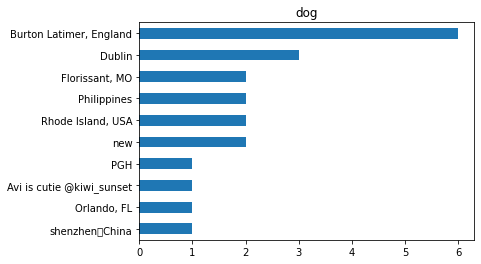

In [150]:
# keywords by place

from nltk.tokenize import word_tokenize


#d['Tweet Text Str'] = d['Tweet Text'].astype('str') 

d['Tweet Text String'] =  d['Tweet Text'].str.lower()


list_f = []

list_location = []

for ii in range(len(key_words)): 
      
    location = []
    for i in range(0, len(d)): 

        if clean_keys[ii] in d.iloc[i, -1]:
            location.append(d.iloc[i, 5])
    fig_loc = pd.Series(location)
    fig_loc2 = fig_loc.value_counts()
    fig_loc2[:10].sort_values().plot(title=clean_keys[ii], kind='barh')
    fname = '{}.jpg'.format(clean_keys[ii])
    plt.savefig(fname)
    
        

In [129]:
# todo 
# 1. clustering and extract key messages - then how they change over time - maybe art or nn
# 2. sentiment analysis - nn 





[None,
 None,
 None,
 None,
 None,
 None,
 None,
 Place(_api=<tweepy.api.API object at 0x135904040>, id='00b028b400039d97', url='https://api.twitter.com/1.1/geo/id/00b028b400039d97.json', place_type='city', name='Santa Fe Springs', full_name='Santa Fe Springs, CA', country_code='US', country='United States', contained_within=[], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x135904040>, type='Polygon', coordinates=[[[-118.098575, 33.882744], [-118.028833, 33.882744], [-118.028833, 33.975123], [-118.098575, 33.975123]]]), attributes={}),
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 Place(_api=<tweepy.api.API object at 0x135904040>, id='67320851475e0c72', url='https://api.twitter.com/1.1/geo/id/67320851475e0c72.json', place_type='city', name='Burton Latimer', full_name='Burton La

not null


'5)'